<a href="https://colab.research.google.com/github/BereketZz/Big_data_Weather/blob/main/sleep_duration_disorder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Introduction
'''
The Sleep Health and Lifestyle Dataset comprises 400 rows and 13 columns, covering a wide range of variables related to sleep and daily habits. It includes details such as gender, age, occupation, sleep duration, quality of sleep, physical activity level, stress levels, BMI category, blood pressure, heart rate, daily steps, and the presence or absence of sleep disorders.
'''

row_data= pd.read_csv("health.csv")

row_data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [7]:
#Questions
'''
Is there a relationship between sleep duration and the occurrence of sleep disorders?
'''

#Data Wrangling
def preprocess_data(data):
    # Standardize column names
    data.columns = [col.lower().replace(" ", "_") for col in data.columns]

    return data
preprocessed_data = preprocess_data(row_data)
preprocessed_data.head()

,person_id,gender,age,occupation,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,bmi_category,blood_pressure,heart_rate,daily_steps,sleep_disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


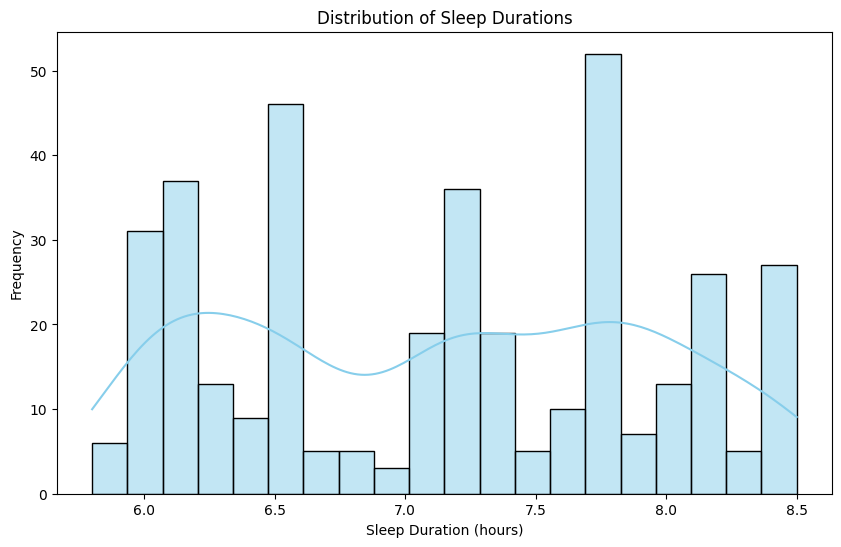

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(row_data['sleep_duration'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Sleep Durations')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Frequency')
plt.show()

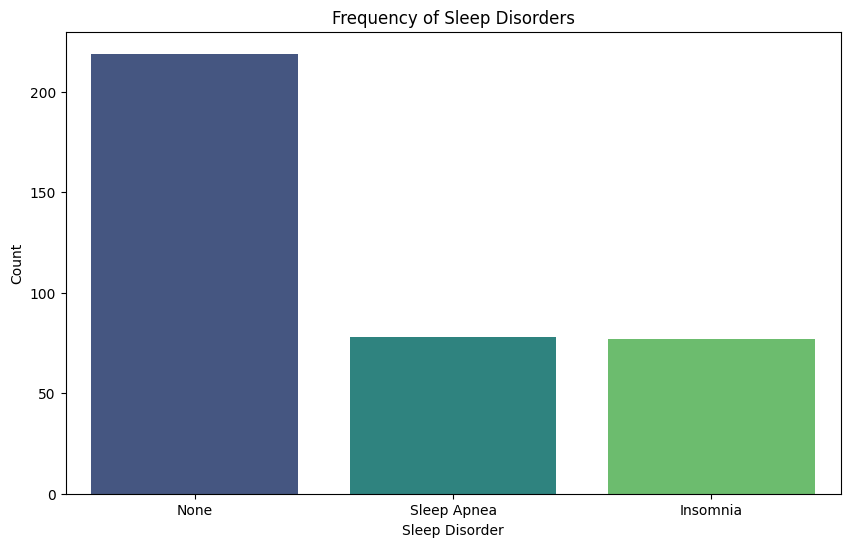

In [9]:
# Countplot for sleep disorders
plt.figure(figsize=(10, 6))
sns.countplot(x='sleep_disorder', data=row_data, palette='viridis')
plt.title('Frequency of Sleep Disorders')
plt.xlabel('Sleep Disorder')
plt.ylabel('Count')
plt.show()

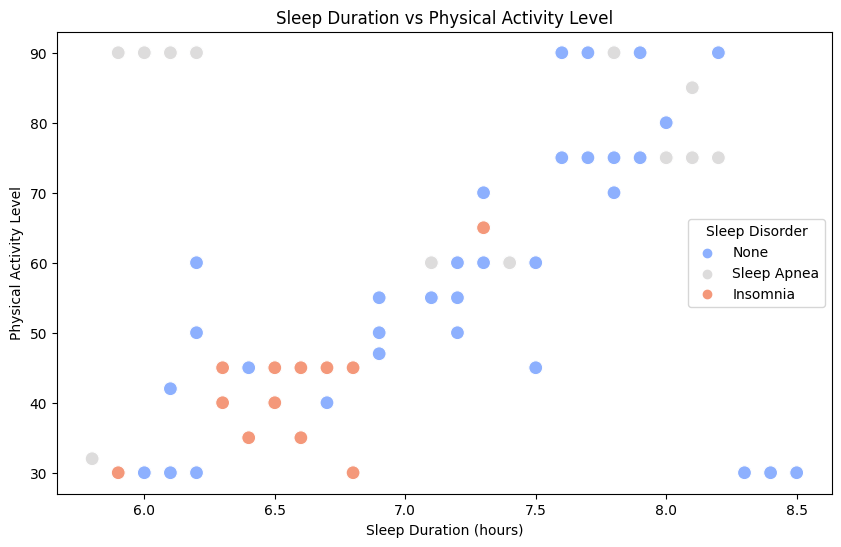

In [10]:
# Scatter plot for Sleep Duration vs Physical Activity Level
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sleep_duration', y='physical_activity_level', data=row_data, hue='sleep_disorder', palette='coolwarm', s=100)
plt.title('Sleep Duration vs Physical Activity Level')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Physical Activity Level')
plt.legend(title='Sleep Disorder')
plt.show()


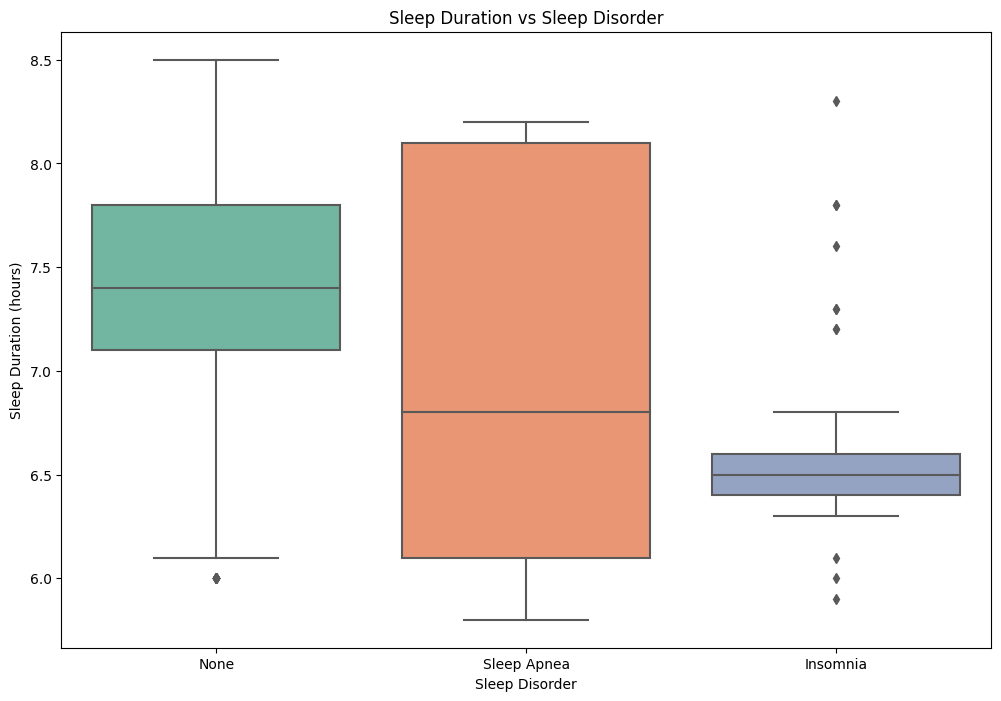

In [11]:
# Boxplot for Sleep Duration vs Sleep Disorder
plt.figure(figsize=(12, 8))
sns.boxplot(x='sleep_disorder', y='sleep_duration', data=row_data, palette='Set2')
plt.title('Sleep Duration vs Sleep Disorder')
plt.xlabel('Sleep Disorder')
plt.ylabel('Sleep Duration (hours)')
plt.show()


<ipython-input-12-15b43aed5431>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='sleep_disorder', y='sleep_duration', data=row_data, ci=None, palette='pastel')


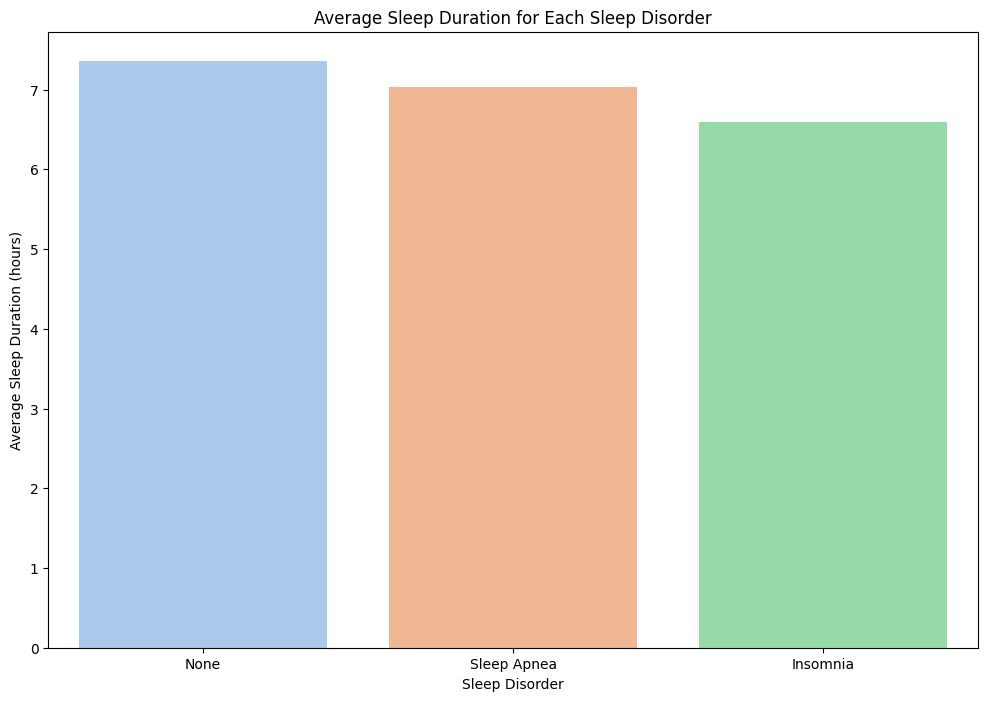

In [12]:
# Bar plot for Sleep Duration vs Sleep Disorder
plt.figure(figsize=(12, 8))
sns.barplot(x='sleep_disorder', y='sleep_duration', data=row_data, ci=None, palette='pastel')
plt.title('Average Sleep Duration for Each Sleep Disorder')
plt.xlabel('Sleep Disorder')
plt.ylabel('Average Sleep Duration (hours)')
plt.show()


In [21]:
# Encode 'sleep_disorder' into numerical values
row_data['sleep_disorder_encoded'] = row_data['sleep_disorder'].astype('category').cat.codes

# Calculate the correlation between sleep duration and the encoded sleep disorder
correlation_sleep_duration_disorder = row_data['sleep_duration'].corr(row_data['sleep_disorder_encoded'])

print(f"Correlation between Sleep Duration and Sleep Disorder: {correlation_sleep_duration_disorder}")


Correlation between Sleep Duration and Sleep Disorder: 0.1775524309175282


In [ ]:
#Conclusion

'''
# Analysis Reflection:

 # Reflection on Data Exploration:
 the data exploration has provided valuable insights into the relationship between sleep duration and various health parameters in the given dataset.
 The primary question, "Is there a relationship between sleep duration and the occurrence of sleep disorders?" has been addressed through several analytical steps.

 # Summary of Main Findings:
 1. Sleep Duration Distribution: The histogram plot of sleep durations revealed that the majority of individuals in the dataset sleep between 6.5 and 8 hours, aligning with the recommended optimal range for health and well-being.
 2.Sleep Disorders and Sleep Duration: The boxplot comparing sleep duration across different sleep disorders indicated distinct patterns:
   Individuals without a sleep disorder tend to have a higher average sleep duration.
   Those with Sleep Apnea exhibit a lower average sleep duration, suggesting a potential correlation between Sleep Apnea and shorter sleep durations.
   People with Insomnia show varied sleep durations, indicating the heterogeneous nature of insomnia's impact on sleep duration.
3.Correlation between Sleep Duration and Sleep Disorder: The correlation coefficient of 0.1775 was calculated, indicating a weak positive correlation. This suggests that, on average, individuals with longer sleep durations tend to have higher numerical values for the encoded sleep disorder variable. However, the correlation is relatively weak, and caution should be exercised in drawing strong conclusions.

#Additional Research Opportunities:
Further research can delve into the specific factors contributing to the observed patterns, such as the influence of lifestyle, stress levels, or medical history on sleep duration and sleep disorders.

#Limitation:
One limitation of this analysis is that it is based on observational data, and causation cannot be inferred. Correlation does not imply causation, and additional factors may influence the observed relationships.

#Future Directions:
Exploring the impact of lifestyle factors on sleep patterns and disorders could provide a more comprehensive understanding.
Gathering more detailed information on participants' daily routines and stressors could enhance the depth of the analysis.

'''